## Part I:  Building Blocks

## Spatial Data

----------------------------------

#### Installations

!pip install osmnx

!pip install rioxarray

!pip install datashader

!pip install contextily

!pip install shapely

In [1]:
!pip install rasterstats

---------------------

In [2]:
import pandas as pd
import osmnx   # can query data from OpenStreetMap, converter
import geopandas
import rioxarray
import xarray   #is a package to work with multi-dimensional labeled arrays
import datashader
import contextily as cx
from shapely import geometry
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
## Code from the book Geographic Data Science with Python

--------------------

In [4]:
### Get the data countries

In [5]:
gt_polygons = geopandas.read_file("./geo_data/countries_clean.gpkg")

In [6]:
###gpkg format???

In [7]:
gt_polygons.head()

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102..."
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101..."
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828...."
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."


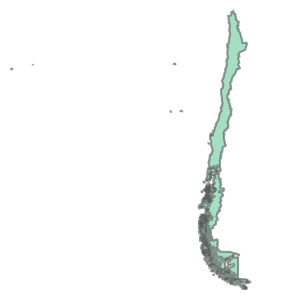

In [8]:
gt_polygons.geometry[2]

In [9]:
type(gt_polygons.geometry[2])

shapely.geometry.multipolygon.MultiPolygon

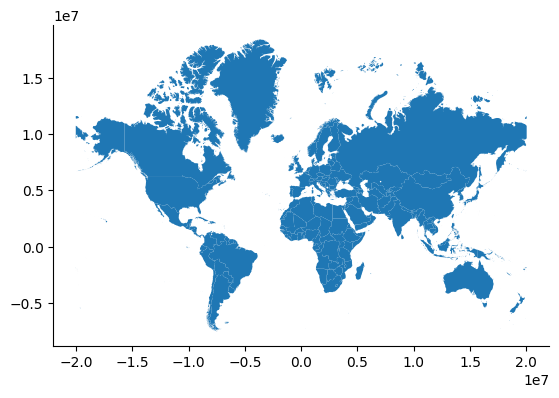

In [10]:
gt_polygons.plot();
sns.despine()

In [11]:
## Adding a centroid map

In [12]:
gt_polygons['centroid'] = gt_polygons.geometry.centroid

In [13]:
gt_polygons.head()

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.810 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-8277554.831 -1032942.536)


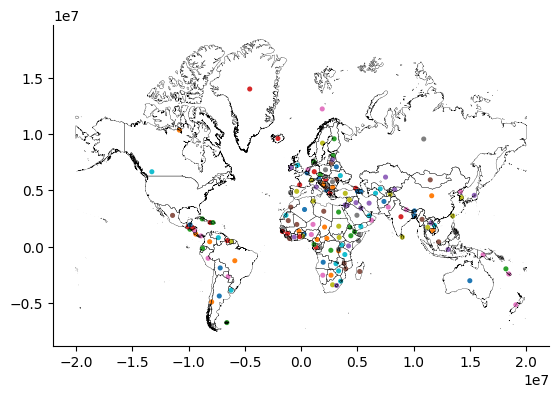

In [14]:
# Plot centroids

ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=7)  

## Plot polygons without color filling
gt_polygons.plot(
    "ADMIN", ax=ax, facecolor="none", edgecolor="k", linewidth=0.2);
sns.despine()

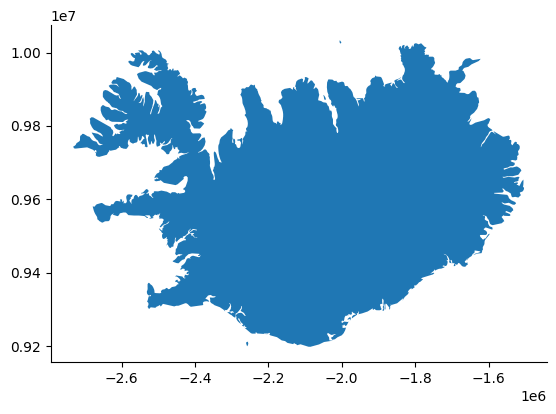

In [15]:
gt_polygons.query('ADMIN == "Iceland"').plot();
sns.despine()

### Tokyo Dataset

In [16]:
gt_points = pd.read_csv("./geo_data/tokyo_clean.csv")

In [17]:
gt_points.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06


- Many point datasets are provided in this format. To make the most of them, it is convenient to convert them into GeoDataFrame tables. 
- There are two steps involved in this process. First, we turn the raw coordinates into geometries:

In [18]:
pt_geoms = geopandas.points_from_xy(x=gt_points["longitude"],
                                   y=gt_points["latitude"],
                                   crs = "EPSG:4326")

In [19]:
type(pt_geoms)

geopandas.array.GeometryArray

In [20]:
# Second, we create a GeoDataFrame object using these geometries:

In [21]:
gt_points = geopandas.GeoDataFrame(gt_points, geometry=pt_geoms)

In [22]:
gt_points.head(2)

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06,POINT (139.70050 35.67400)
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06,POINT (139.76652 35.70909)


## Surfaces

In [23]:
pop =xarray.open_rasterio("./geo_data/ghsl_sao_paulo.tif")

/var/folders/2z/1gmxsnx16d34kv3j2t6lvbqw0000gn/T/ipykernel_3337/2837562829.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  pop =xarray.open_rasterio("./geo_data/ghsl_sao_paulo.tif")


In [24]:
pop

<xarray.DataArray (band: 1, y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
Attributes:
    transform:      (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)
    crs:            +proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +...
    res:            (250.0, 250.0)
    is_tiled:       0
    nodatavals:     (-200.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

In [25]:
type(pop)

xarray.core.dataarray.DataArray

In [26]:
pop.coords    #band as a third dimension is not very useful

Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06

In [27]:
#An xarray.DataArray object contains additional information about the values stored under the attrs attribute:

In [28]:
pop.attrs

{'transform': (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0),
 'crs': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs=True',
 'res': (250.0, 250.0),
 'is_tiled': 0,
 'nodatavals': (-200.0,),
 'scales': (1.0,),
 'offsets': (0.0,),
 'AREA_OR_POINT': 'Area',
 'grid_mapping': 'spatial_ref'}

In [29]:
# res: resolution 250 meters by 250 meters

In [30]:
pop.shape

(1, 416, 468)

In [31]:
pop.sel(band=1)  #sel operator,  allows us to select data by the value of their coordinates:

<xarray.DataArray (y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
    band     int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
Attributes:
    transform:      (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)
    crs:            +proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +...
    res:            (250.0, 250.0)
    is_tiled:       0
    nodatavals:     (-200.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

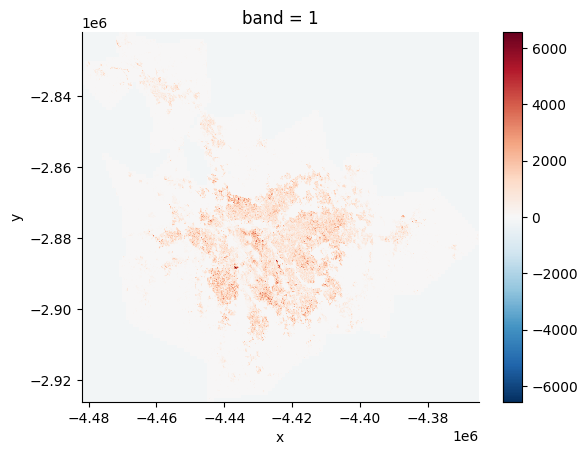

In [32]:
pop.sel(band=1).plot();
sns.despine()

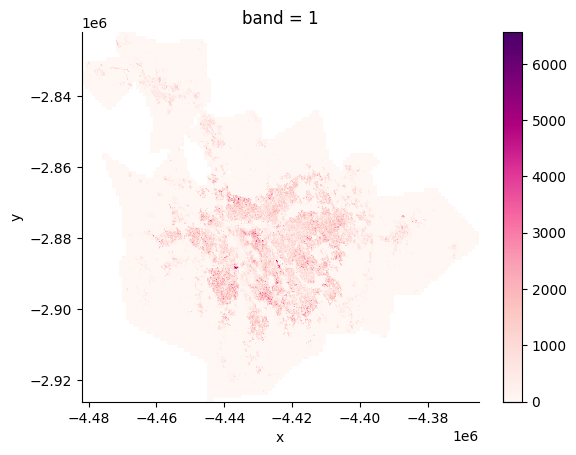

In [33]:
pop.where(pop != -200).sel(band=1).plot(cmap="RdPu");
sns.despine()#### -200 missing values


### Spatial graphs

In [34]:
##They do not record measurements about a given phenomena, but instead focus on connections, on storing relationships between objects as they are facilitated (or impeded in their absence) by space.

_In a spatial network, nodes may represent geographical places, and thus have a specific location; likewise, edges may represent geographical paths between these places. Networks require both nodes and edges to analyze their structure._

In [35]:
graph = osmnx.graph_from_place("Yoyogi Park, Shibuya, Tokyo, Japan")

In [36]:
graph

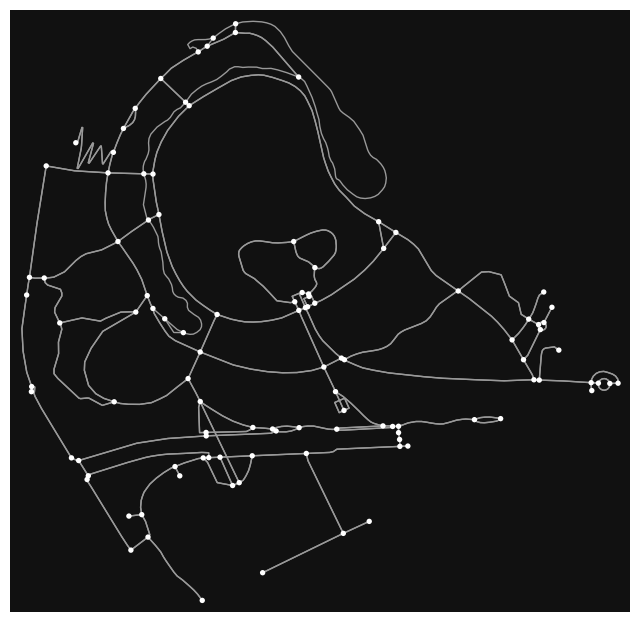

In [37]:
osmnx.plot_graph(graph);

In [38]:
len(graph.nodes)

108

In [39]:
len(graph.edges)

291

In [40]:
graph.nodes[1520546819]   # query by an id

{'y': 35.6711267, 'x': 139.6925951, 'street_count': 4}

In [41]:
graph.edges[(1520546819, 3010293622, 0)]

{'osmid': 138670840,
 'highway': 'footway',
 'oneway': False,
 'reversed': False,
 'length': 59.113,
 'geometry': <shapely.geometry.linestring.LineString at 0x281b851c0>}

In [42]:
### What other nodes are directly connected to node 1520546819?

list(graph.adj[1520546819].keys())

[3010293622, 5764960322, 1913626649, 1520546959]

## Surfaces

In [43]:
#### Transform to a table

In [44]:
surface = xarray.open_rasterio("./geo_data/ghsl_sao_paulo.tif")

/var/folders/2z/1gmxsnx16d34kv3j2t6lvbqw0000gn/T/ipykernel_3337/2056493515.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  surface = xarray.open_rasterio("./geo_data/ghsl_sao_paulo.tif")


In [45]:
t_surface = surface.to_series()

In [46]:
t_surface

band  y           x         
1     -2822125.0  -4481875.0   -200.0
                  -4481625.0   -200.0
                  -4481375.0   -200.0
                  -4481125.0   -200.0
                  -4480875.0   -200.0
                                ...  
      -2925875.0  -4366125.0   -200.0
                  -4365875.0   -200.0
                  -4365625.0   -200.0
                  -4365375.0   -200.0
                  -4365125.0   -200.0
Length: 194688, dtype: float32

In [47]:
### dataframe

t_surface=t_surface.reset_index().rename(columns={0:"Value"})

In [48]:
t_surface.query("Value > 1000").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 3785 to 181296
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    7734 non-null   int64  
 1   y       7734 non-null   float64
 2   x       7734 non-null   float64
 3   Value   7734 non-null   float32
dtypes: float32(1), float64(2), int64(1)
memory usage: 271.9 KB


In [49]:
def row2cell(row, res_xy):
    res_x, res_y =res_xy # Extract resolution for each dimension
    # XY coordinates are centered on the pixel
    minX = row["x"]-(res_x / 2)
    maxX = row["x"]+(res_x / 2)
    minY = row["y"]+(res_y / 2)
    maxY = row["y"]-(res_y / 2)
    poly = geometry.box(
    minX, minY, maxX, maxY
    #build a square polygon
    )
    return poly
    

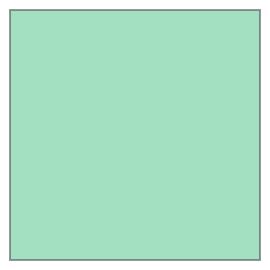

In [50]:
row2cell(t_surface.loc[0, :], surface.attrs["res"])

In [51]:
max_polys = (
    t_surface.query(
        "Value > 1000"
    )  # Keep only cells with more than 1k people
    .apply(  # Build polygons for selected cells
        row2cell, res_xy=surface.attrs["res"], axis=1
    )
    .pipe(  # Pipe result from apply to convert into a GeoSeries
        geopandas.GeoSeries, crs=surface.attrs["crs"]
    )
)

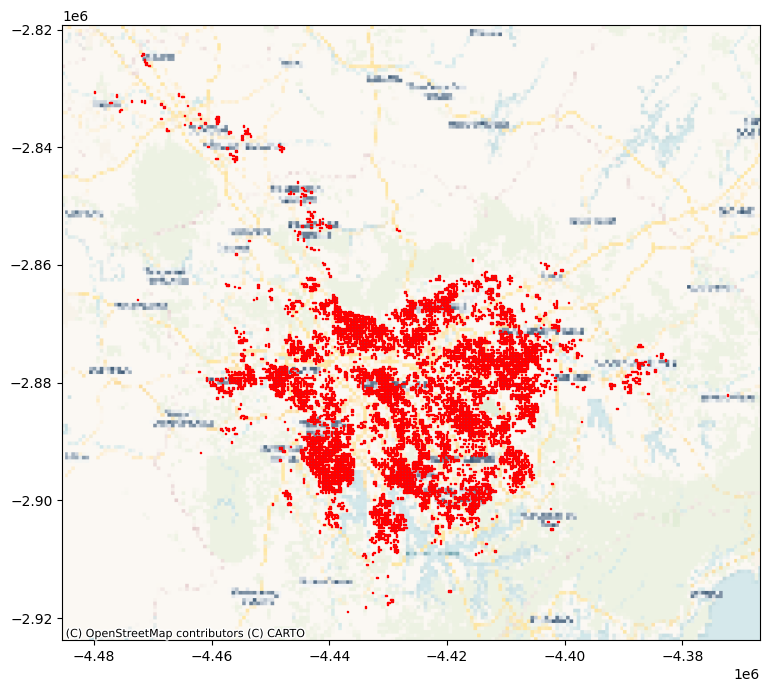

In [52]:
# Plot polygons
ax = max_polys.plot(edgecolor="red", figsize=(9, 9))
# Add basemap
cx.add_basemap(
    ax, crs=surface.attrs["crs"], source=cx.providers.CartoDB.Voyager
);

In [53]:
new_da = xarray.DataArray.from_series(
    t_surface.set_index(["band", "y", "x"])["Value"]
)
new_da

<xarray.DataArray 'Value' (band: 1, y: 416, x: 468)>
array([[[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -2.926e+06 -2.926e+06 ... -2.822e+06 -2.822e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06

### Pixels to polygons

/var/folders/2z/1gmxsnx16d34kv3j2t6lvbqw0000gn/T/ipykernel_3337/631974893.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  dem = xarray.open_rasterio("./geo_data/nasadem_sd.tif").sel(band=1)


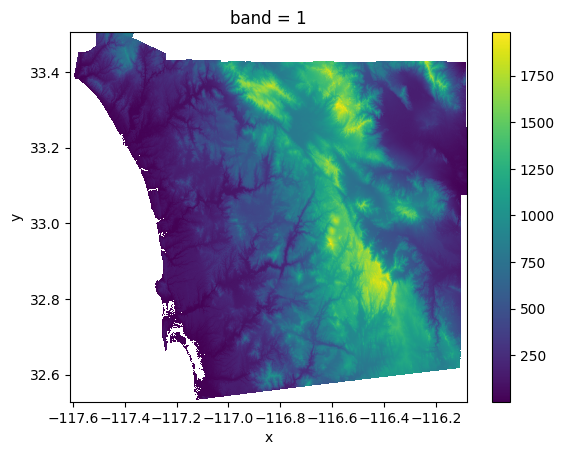

In [54]:
dem = xarray.open_rasterio("./geo_data/nasadem_sd.tif").sel(band=1)
dem.where(dem > 0).plot.imshow();

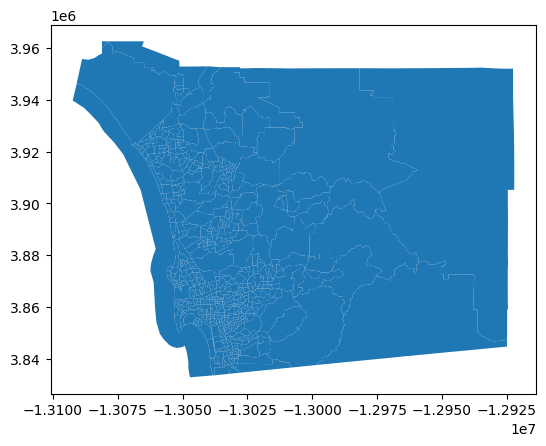

In [55]:
sd_tracts = geopandas.read_file("./geo_data/sandiego_tracts.gpkg")
sd_tracts.plot();

In [56]:
sd_tracts.head()

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
0,06073018300,37.1,2590.0,2375.0,1299.0,2590.0,137.0,0.0,62500.0,0.5355,...,06,073,018300,2.876449,0.373913,0.052896,0.000000,0.916988,False,"POLYGON ((-13069450.120 3922380.770, -13069175..."
1,06073018601,41.2,5147.0,4069.0,1970.0,5147.0,562.0,24.0,88165.0,0.4265,...,06,073,018601,4.548797,0.205144,0.109190,0.004663,0.790558,False,"POLYGON ((-13067719.770 3922939.420, -13067631..."
2,06073017601,54.4,5595.0,4925.0,1702.0,5595.0,442.0,34.0,110804.0,0.4985,...,06,073,017601,8.726275,0.279029,0.078999,0.006077,0.880250,False,"POLYGON ((-13058166.110 3907247.690, -13058140..."
3,06073019301,42.3,7026.0,5625.0,3390.0,7026.0,638.0,46.0,100539.0,0.4003,...,06,073,019301,3.519743,0.196512,0.090806,0.006547,0.800598,False,"POLYGON ((-13056896.290 3925255.610, -13056868..."
4,06073018700,21.8,40402.0,30455.0,24143.0,40402.0,2456.0,23.0,41709.0,0.3196,...,06,073,018700,559.150793,0.949887,0.060789,0.000569,0.753799,False,"POLYGON ((-13090788.510 3946435.430, -13090736..."


In [57]:
# Compute the average altitude of each neighborhood.


largest_tract_id = sd_tracts.query(
    f"area_sqm == {sd_tracts['area_sqm'].max()}").index[0]

In [58]:
largest_tract = sd_tracts.loc[largest_tract_id, "geometry"]

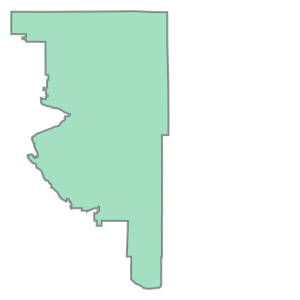

In [59]:
largest_tract

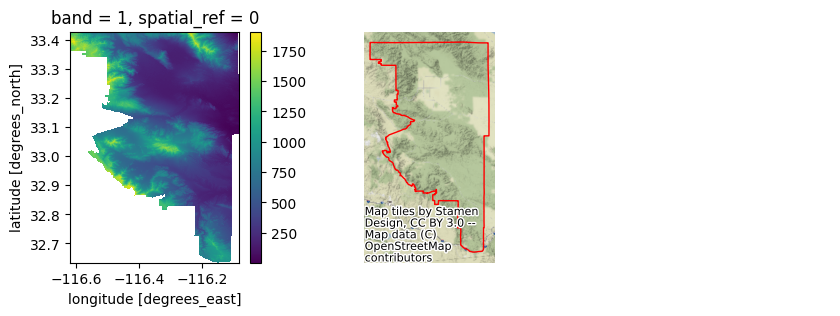

In [60]:
# Clip the elevation for the largest tract

dem_clip = dem.rio.clip([largest_tract.__geo_interface__], 
                        crs=sd_tracts.crs)
# Set up figure to display against polygon shape
f, axs = plt.subplots(1, 2, figsize=(6, 3))
# Display elevation of largest tract
dem_clip.where(dem_clip > 0).plot(ax=axs[0], add_colorbar=True)
# Display largest tract polygon
sd_tracts.loc[[largest_tract_id]].plot(
    ax=axs[1], edgecolor="red", facecolor="none"
)
axs[1].set_axis_off()
# Add basemap
cx.add_basemap(
    axs[1], crs=sd_tracts.crs, source=cx.providers.Stamen.Terrain
);

In [61]:
# When we have the elevation measurements for all the pixles within the tract, calculate the average with mean()

In [62]:
dem_clip.where(dem_clip > 0).mean()

<xarray.DataArray ()>
array(585.11375946)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

In [63]:
#Apply the method above to each row of the table


def get_mean_elevation(row, dem):
    #Extract geometry object
    geom = row['geometry'].__geo_interface__
    #Clip the surface to extract pixels within 'geom'
    section = dem.rio.clip([geom], crs=sd_tracts.crs)
    #Calculate mean elevation
    elevation = float(section.where(section > 0).mean())
    return elevation
    

In [64]:
get_mean_elevation(sd_tracts.loc[largest_tract_id, :], dem)

585.1137594576915

In [65]:
# Run on each polygon with apply()

elevations = sd_tracts.head().apply(
    get_mean_elevation, dem=dem, axis=1
)
elevations

0      7.144268
1     35.648492
2     53.711389
3     91.358777
4    187.311972
dtype: float64

In [66]:
from rasterstats import zonal_stats  ### will be faster than approach above

In [67]:
elevations2 = zonal_stats(
    sd_tracts.to_crs(dem.rio.crs),  # Geotable with zones
    "./geo_data/nasadem_sd.tif"  
)
elevations2 = pd.DataFrame(elevations2)

In [68]:
elevations2.head()

,min,max,mean,count
0,-12.0,18.0,3.538397,3594
1,-2.0,94.0,35.616395,5709
2,-5.0,121.0,48.742630,10922
3,31.0,149.0,91.358777,4415
4,-32.0,965.0,184.284941,701973


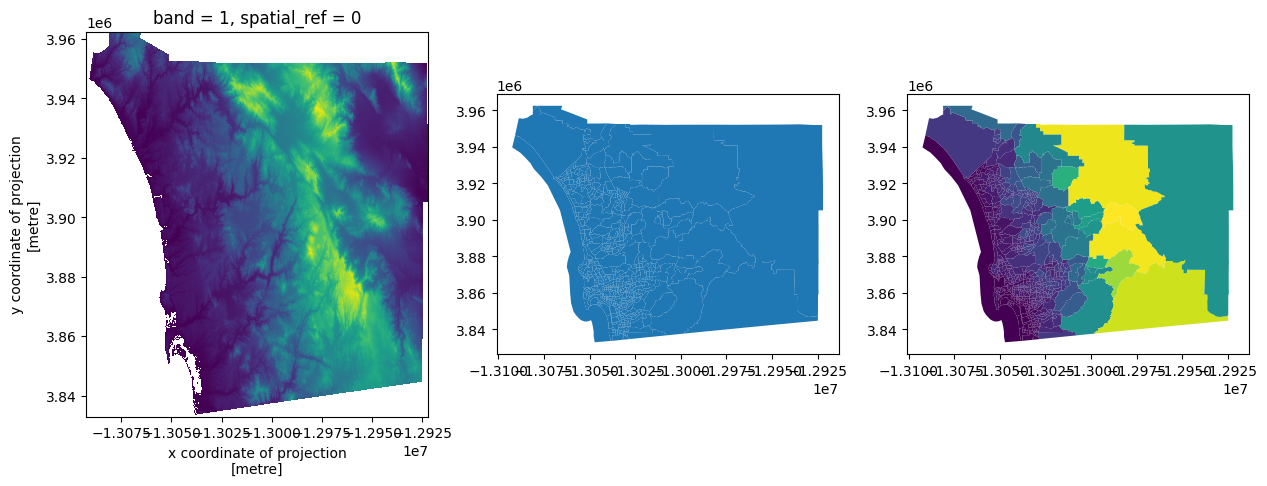

In [69]:
# Create an elevation map

# Set up figure
f, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot elevation surface
dem.where(  # Keep only pixels above sea level
    dem
    > 0
    # Reproject to CRS of tracts
).rio.reproject(
    sd_tracts.crs
    # Render surface
).plot.imshow(
    ax=axs[0], add_colorbar=False
)

# Plot tract geography
sd_tracts.plot(ax=axs[1])

# Plot elevation on tract geography
sd_tracts.assign(  # Append elevation values to tracts
    elevation=elevations2["mean"]
).plot(  # Plot elevation choropleth
    "elevation", ax=axs[2]
);

### Tables as surface

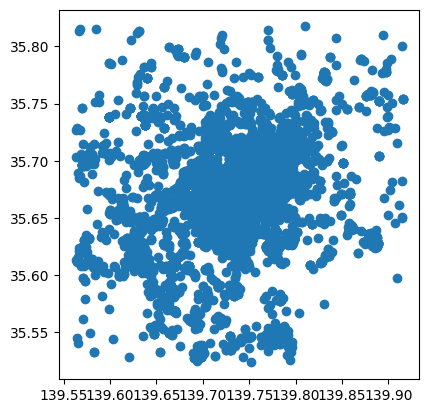

In [70]:
gt_points.plot();  # Tokyo dataset

In [71]:
### Use datashader library

# Set up a grid into which we want to aggregate points

cvs = datashader.Canvas(plot_width=60, plot_height=60)

In [72]:
cvs

In [73]:
grid = cvs.points(gt_points, x="longitude", y="latitude")

In [74]:
grid

<xarray.DataArray (latitude: 60, longitude: 60)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * longitude  (longitude) float64 139.6 139.6 139.6 139.6 ... 139.9 139.9 139.9
  * latitude   (latitude) float64 35.53 35.53 35.54 35.54 ... 35.81 35.81 35.82

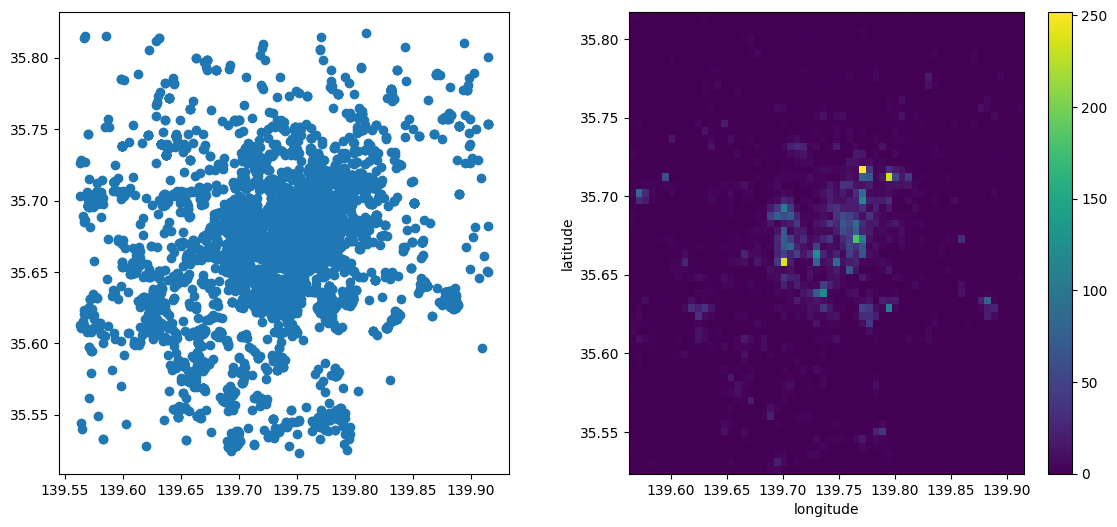

In [75]:
f, axs = plt.subplots(1, 2, figsize=(14, 6))
gt_points.plot(ax=axs[0])
grid.plot(ax=axs[1]);

In [76]:
## Networks as graphs and tables

A Graph is a non-linear data structure consisting of nodes and edges. The nodes are sometimes also referred to as vertices and the edges are lines or arcs that connect any two nodes in the graph.

In [77]:
gt_intersections, gt_lines = osmnx.graph_to_gdfs(graph)

In [80]:
gt_intersections.tail()

,y,x,street_count,highway,geometry
osmid,,,,,
6567205952,35.667736,139.692054,3,NaN,POINT (139.69205 35.66774)
6856536019,35.670268,139.695696,3,NaN,POINT (139.69570 35.67027)
6856536046,35.670364,139.690993,3,NaN,POINT (139.69099 35.67036)
7684088896,35.674229,139.694659,4,NaN,POINT (139.69466 35.67423)
9926245792,35.669060,139.691081,3,NaN,POINT (139.69108 35.66906)


In [81]:
gt_lines.head()

osmid  highway  oneway reversed   length  \
u         v          key                                                 
886196069 1520546857 0     75089904  footway   False    False  191.370   
          886196187  0     75089904  footway   False     True  134.209   
          1519651427 0    138582748  footway   False     True   65.163   
886196073 886196100  0     75089904  footway   False    False   36.275   
          886196106  0     75089904  footway   False     True  115.933   

                                                                   geometry  \
u         v          key                                                      
886196069 1520546857 0    LINESTRING (139.69433 35.67009, 139.69421 35.6...   
          886196187  0    LINESTRING (139.69433 35.67009, 139.69458 35.6...   
          1519651427 0    LINESTRING (139.69433 35.67009, 139.69428 35.6...   
886196073 886196100  0    LINESTRING (139.69951 35.66972, 139.69971 35.6...   
          886196106  0    LINESTRING (139.69951 35.66972, 139.69937 35.6...   

                         bridge name access tunnel  
u         v          key                            
886196069 1520546857 0      NaN  NaN    NaN    NaN  
          886196187  0      NaN  NaN    NaN    NaN  
          1519651427 0      NaN  NaN    NaN    NaN  
886196073 886196100  0      NaN  NaN    NaN    NaN  
          886196106  0      NaN  NaN    NaN    NaN

In [82]:
new_graph = osmnx.graph_from_gdfs(gt_intersections, gt_lines)

In [85]:
new_graph